In [1]:
#pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib catboost tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv('Energy_Consumption.csv')

## Data Understanding

In [4]:
print("Preview of First 3 Rows:\n", df.head(3))


Preview of First 3 Rows:
              Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   

  HVACUsage LightingUsage  RenewableEnergy DayOfWeek Holiday  \
0        On           Off         2.774699    Monday      No   
1        On            On        21.831384  Saturday      No   
2       Off           Off         6.764672    Sunday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  


In [5]:
print("\nShape of the DataFrame (Rows, Columns):", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values Per Column:\n", df.isnull().sum())


Shape of the DataFrame (Rows, Columns): (1000, 11)

Column Names:
 ['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday', 'EnergyConsumption']

Summary Statistics:
        Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000        15.132813   
std       2.836850     8.518905     288.418873     2.865598         8.745917   
min      20.007565    30.015975    1000.512661     0.000000         0.006642   
25%      22.645070    38.297722    1247.108548     2.000000         7.628385   
50%      24.751637    45.972116    1507.967426     5.000000        15.072296   
75%      27.418174    52.420066    1740.340165     7.000000        22.884064   
max      29.998671    59.969085    1999.982252     9.000000        29.965327   

       EnergyConsumption

In [6]:
print(df.dtypes)

Timestamp             object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object


## Data Manipulation /Feature Engineering

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['date'] = df['Timestamp'].dt.date
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year
df['day'] = df['Timestamp'].dt.day
df['hour_of_the_day'] = df['Timestamp'].dt.hour

df[['date','month']]

,date,month
0,2022-01-01,1
1,2022-01-01,1
2,2022-01-01,1
3,2022-01-01,1
4,2022-01-01,1
...,...,...
995,2022-02-11,2
996,2022-02-11,2
997,2022-02-11,2
998,2022-02-11,2


In [8]:
print(df['HVACUsage'].unique())
print(df['LightingUsage'].unique())

['On' 'Off']
['Off' 'On']


In [9]:
df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['HVACUsage'].unique()

array([1, 0])

In [10]:
df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})
df['LightingUsage'].unique()

array([0, 1])

### Extract Cyclic features

In [11]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_the_day'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_the_day'] / 24)

In [12]:
df[['hour_sin','hour_cos']]

,hour_sin,hour_cos
0,0.000000e+00,1.000000
1,2.588190e-01,0.965926
2,5.000000e-01,0.866025
3,7.071068e-01,0.707107
4,8.660254e-01,0.500000
...,...,...
995,2.588190e-01,-0.965926
996,1.224647e-16,-1.000000
997,-2.588190e-01,-0.965926
998,-5.000000e-01,-0.866025


## Interaction and Lag features

In [13]:


df['Temp_Occupancy'] = df['Temperature'] * df['Occupancy']
df['Hour_HVAC'] = df['hour_cos'] * df['HVACUsage']
df['EnergyConsumption_lag1'] = df['EnergyConsumption'].shift(1)
df['EnergyConsumption_lag2'] = df['EnergyConsumption'].shift(2)


In [14]:
df.isnull().sum()

Timestamp                 0
Temperature               0
Humidity                  0
SquareFootage             0
Occupancy                 0
HVACUsage                 0
LightingUsage             0
RenewableEnergy           0
DayOfWeek                 0
Holiday                   0
EnergyConsumption         0
date                      0
month                     0
year                      0
day                       0
hour_of_the_day           0
hour_sin                  0
hour_cos                  0
Temp_Occupancy            0
Hour_HVAC                 0
EnergyConsumption_lag1    1
EnergyConsumption_lag2    2
dtype: int64

## Impute missing values

In [15]:
df['EnergyConsumption_lag1'].fillna(df['EnergyConsumption'].mean(), inplace=True)
df['EnergyConsumption_lag2'].fillna(df['EnergyConsumption'].mean(), inplace=True)


C:\Users\balaji.ramachandran\AppData\Local\Temp\ipykernel_18092\970490971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EnergyConsumption_lag1'].fillna(df['EnergyConsumption'].mean(), inplace=True)
C:\Users\balaji.ramachandran\AppData\Local\Temp\ipykernel_18092\970490971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

## One hot Encoding for categorical features



In [16]:
dummies = pd.get_dummies(df[['Holiday', 'DayOfWeek']], drop_first=True)
df = pd.concat([df, dummies], axis=1)
# Linear Models or Tree based or Distance based models

# from sklearn.preprocessing import LabelEncoder  # Tree based

# le = LabelEncoder()
# df['Holiday_encoded'] = le.fit_transform(df['Holiday'])  # Yes=1, No=0
# df['DayOfWeek_encoded'] = le.fit_transform(df['DayOfWeek'])


In [17]:
df.shape

(1000, 29)

## Data Visulisation

### Scatter Chart

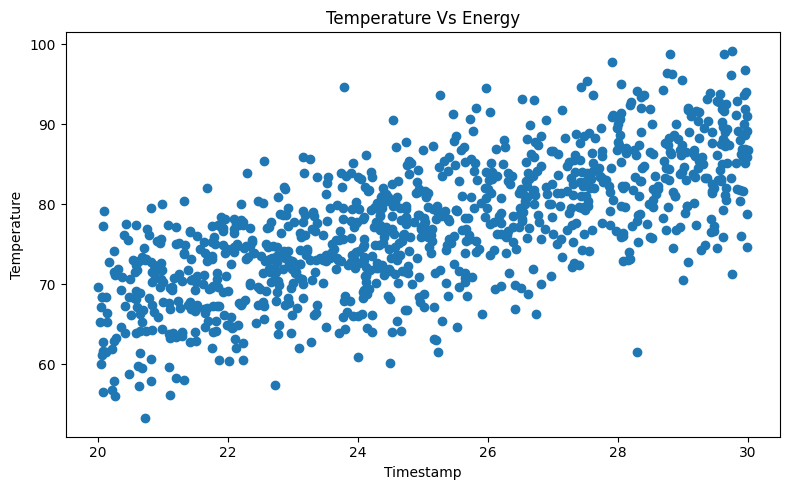

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(df['Temperature'],df['EnergyConsumption'])
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature Vs Energy')
plt.tight_layout()
plt.show()

### Line plot

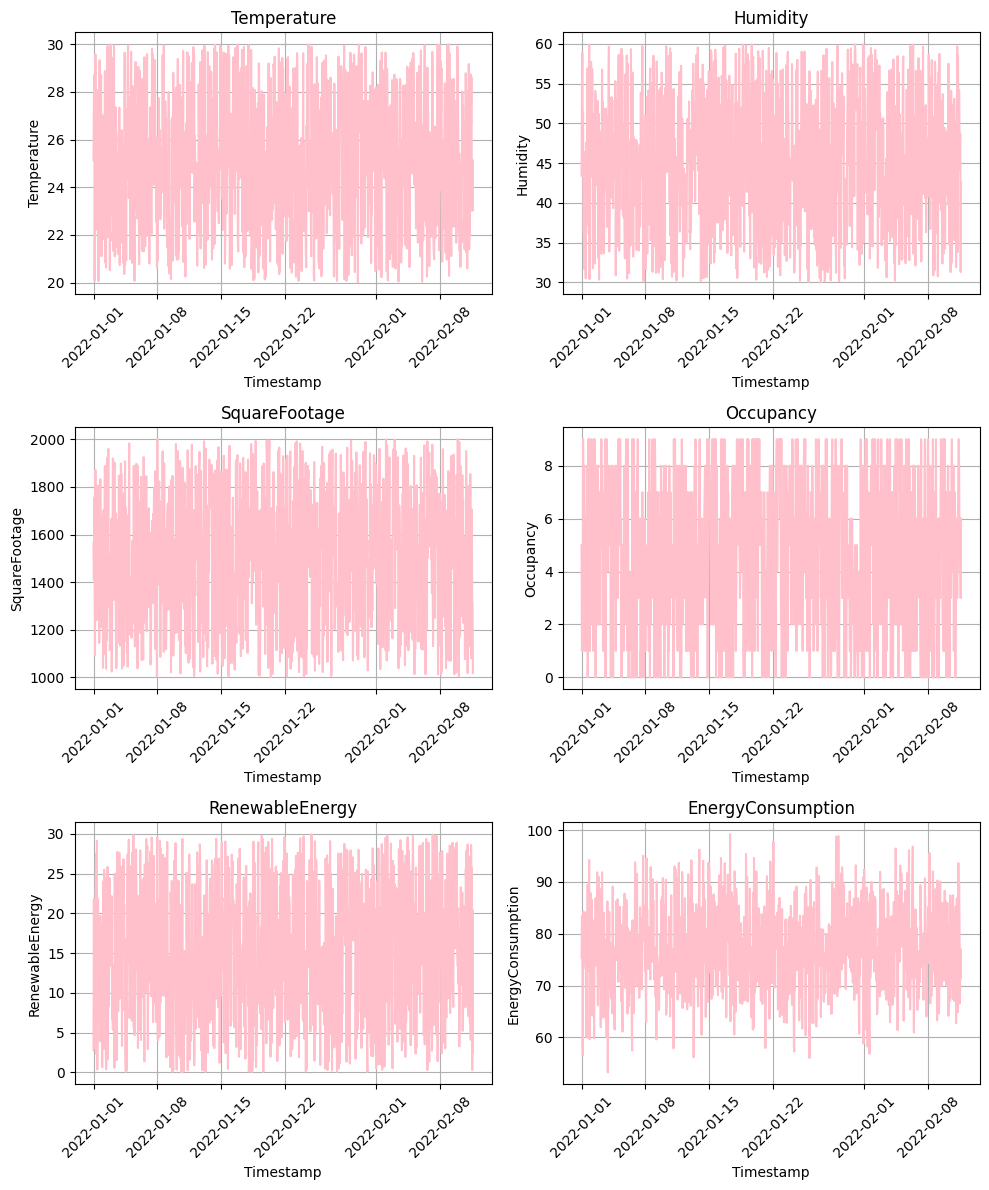

In [19]:
import math

#df_numeric = df.select_dtypes(include = 'number')
df_numeric = df[['Temperature', 'Humidity', 'SquareFootage', 'Occupancy','RenewableEnergy', 'EnergyConsumption']]                                        
numeric_cols = df_numeric.columns

ncols = 2
nrows = math.ceil(len(numeric_cols)/ ncols)

plt.figure(figsize = (5 * ncols , 4 * nrows))

for i in range(len(numeric_cols)):
    col = numeric_cols[i]
    plt.subplot(nrows,ncols,i+1)
    plt.plot(df['Timestamp'], df_numeric[col] , color ='pink')
    plt.title(col)
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Histogram

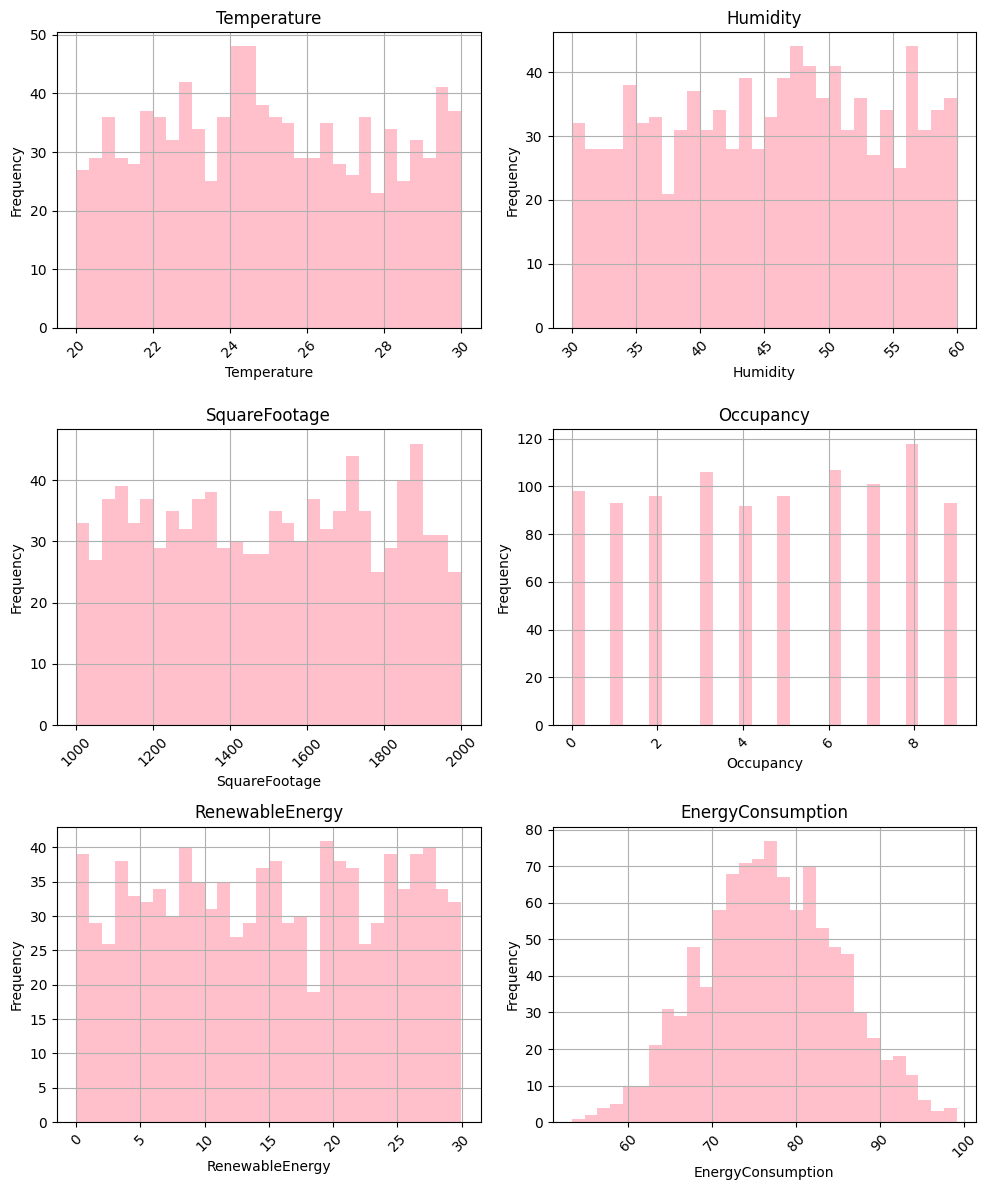

In [20]:

ncols = 2
nrows = math.ceil(len(numeric_cols)/ ncols)

plt.figure(figsize = (5 * ncols , 4 * nrows))

for i in range(len(numeric_cols)):
    col = numeric_cols[i]
    plt.subplot(nrows,ncols,i+1)
    plt.hist(df_numeric[col] ,bins= 30, color ='pink')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Boxplot

<Axes: ylabel='RenewableEnergy'>

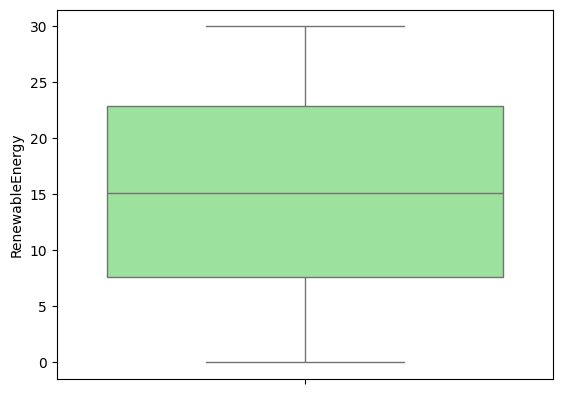

In [21]:
sns.boxplot(y=df['RenewableEnergy'], color='lightgreen')

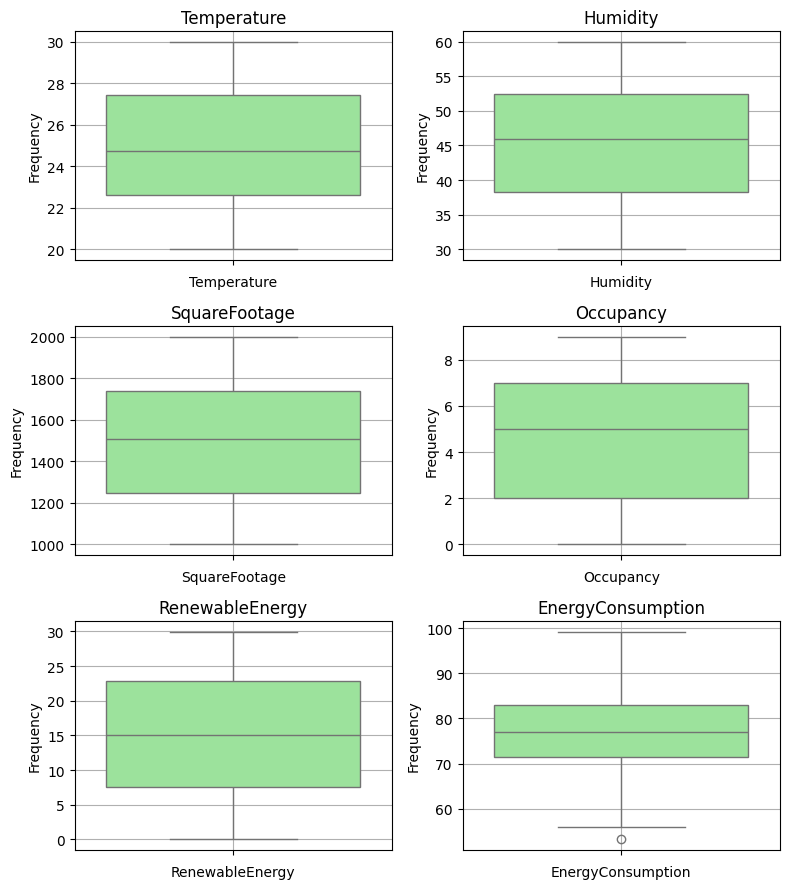

In [22]:
ncols = 2
nrows = math.ceil(len(numeric_cols)/ ncols)

plt.figure(figsize = (4 * ncols , 3 * nrows))

for i in range(len(numeric_cols)):
    col = numeric_cols[i]
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(y=df_numeric[col], color='lightgreen')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

<Axes: xlabel='HVACUsage', ylabel='EnergyConsumption'>

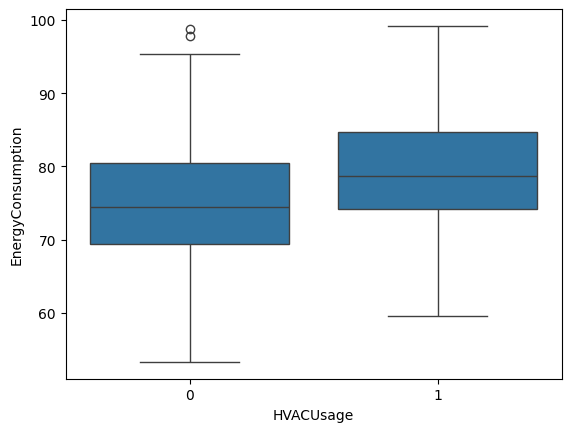

In [23]:
sns.boxplot(x='HVACUsage', y='EnergyConsumption', data=df)

<Axes: xlabel='Temperature', ylabel='EnergyConsumption'>

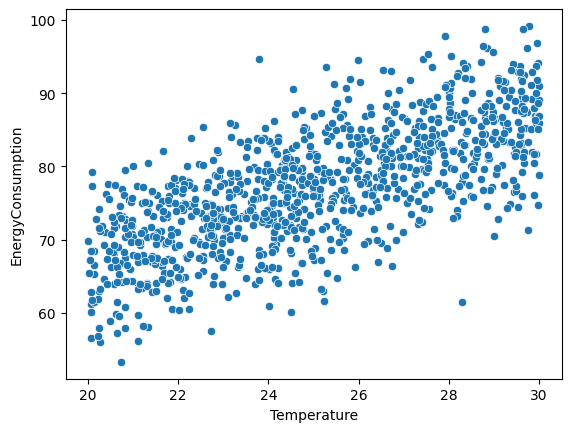

In [24]:
sns.scatterplot(x='Temperature', y='EnergyConsumption', data=df)

<Axes: xlabel='day', ylabel='EnergyConsumption'>

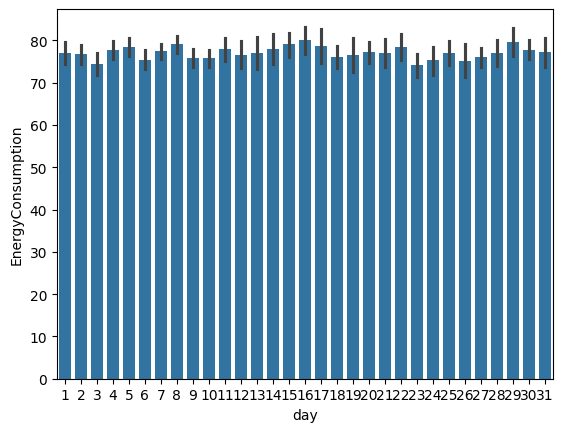

In [25]:
sns.barplot(x='day', y='EnergyConsumption', data=df)

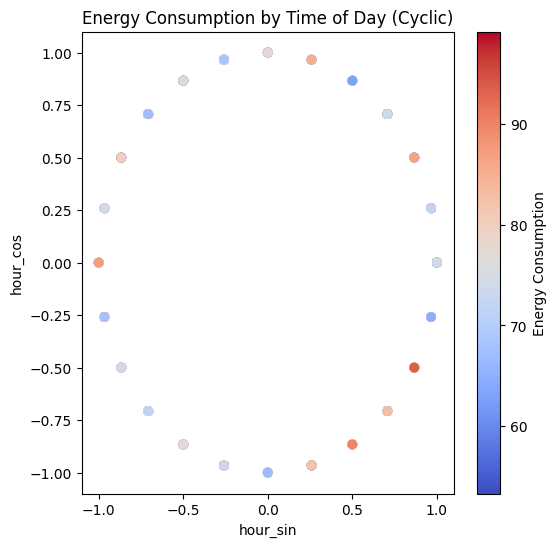

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(df['hour_sin'], df['hour_cos'], c=df['EnergyConsumption'], cmap='coolwarm')
plt.colorbar(label='Energy Consumption')
plt.xlabel('hour_sin')
plt.ylabel('hour_cos')
plt.title('Energy Consumption by Time of Day (Cyclic)')
plt.show()

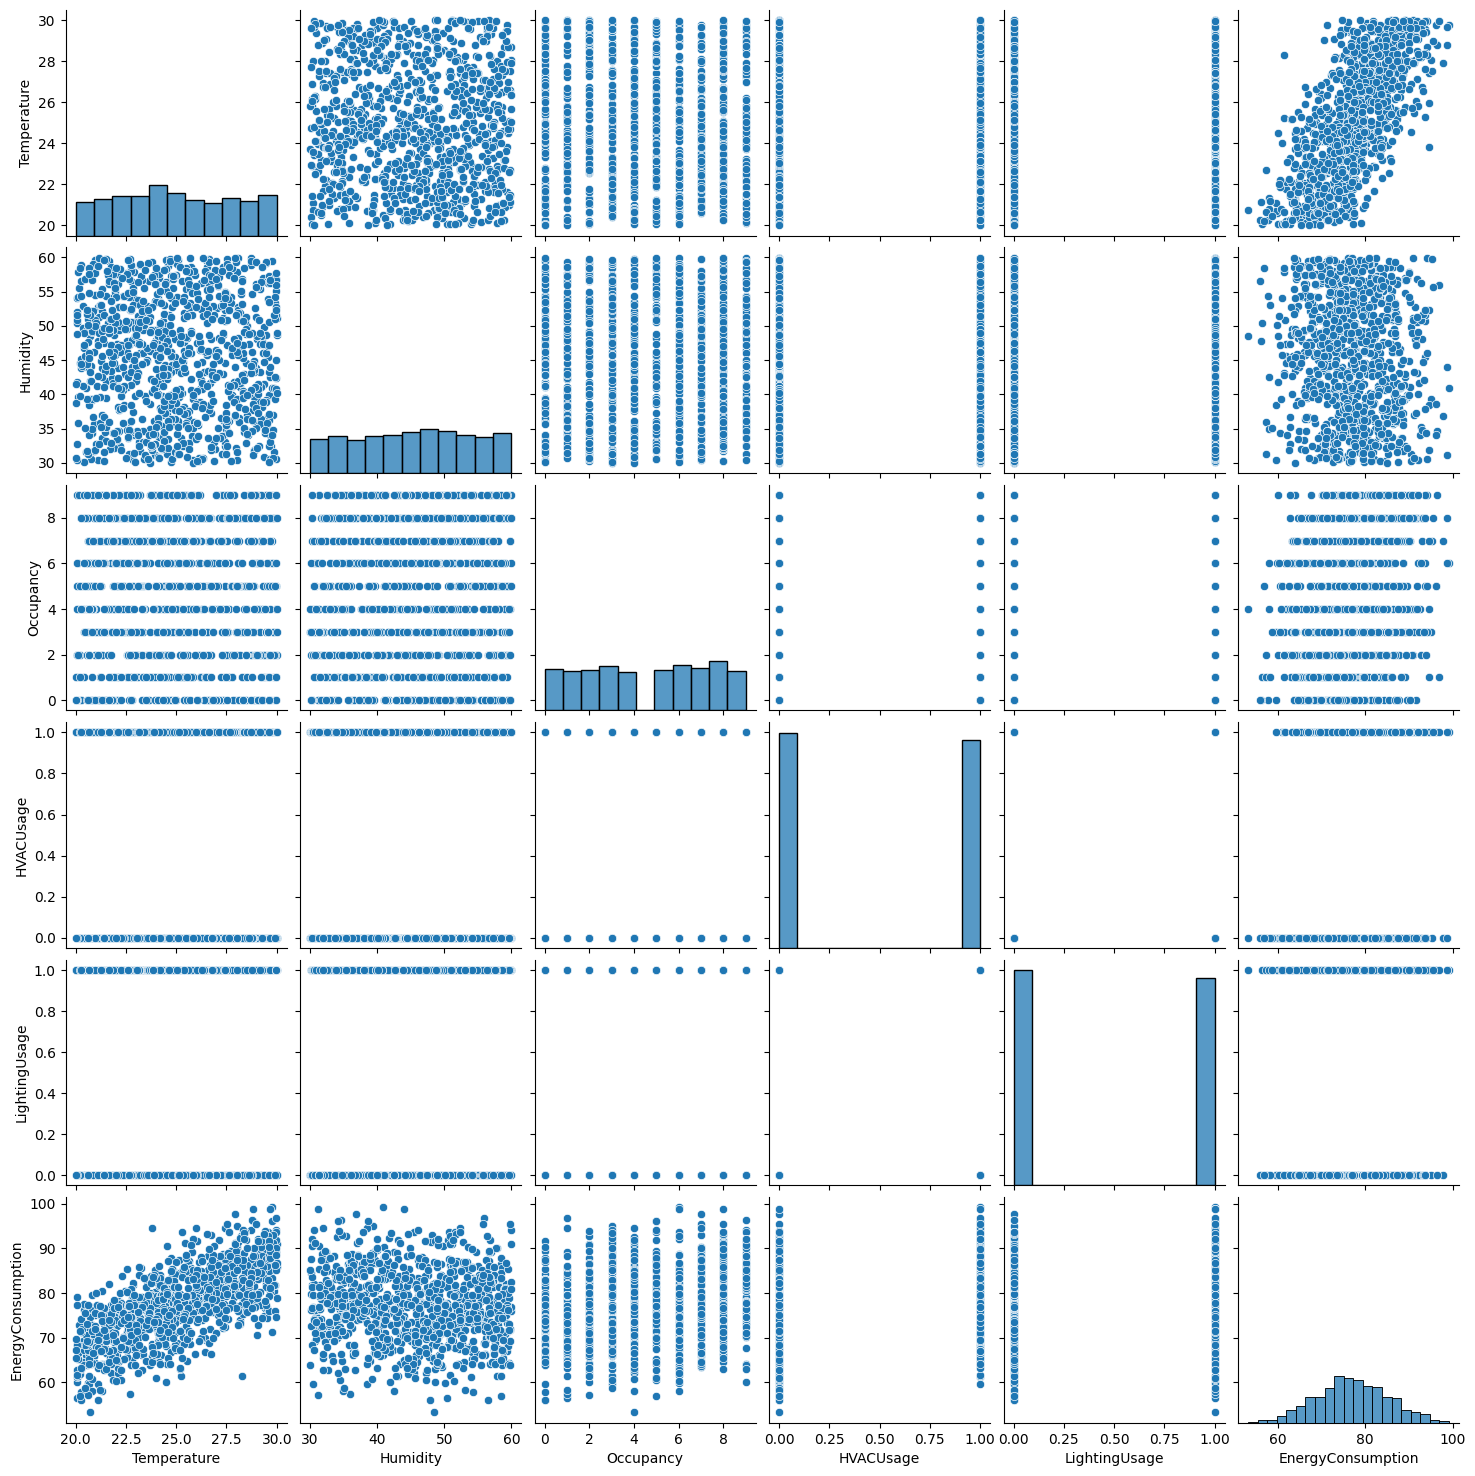

In [27]:
sns.pairplot(df[['Temperature', 'Humidity','Occupancy', 'HVACUsage', 'LightingUsage', 'EnergyConsumption']])


<Axes: xlabel='Holiday', ylabel='EnergyConsumption'>

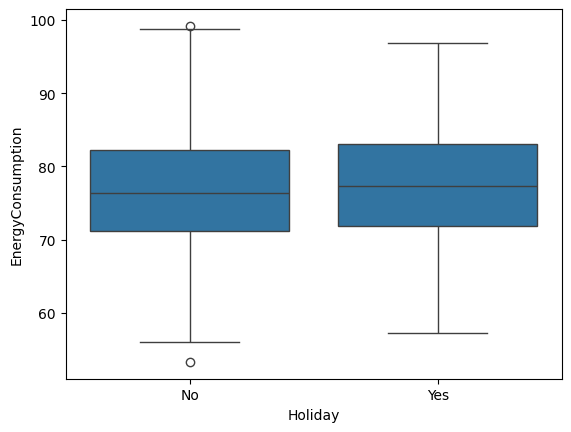

In [28]:
sns.boxplot(x='Holiday', y='EnergyConsumption', data=df)

<Axes: xlabel='hour_of_the_day', ylabel='EnergyConsumption'>

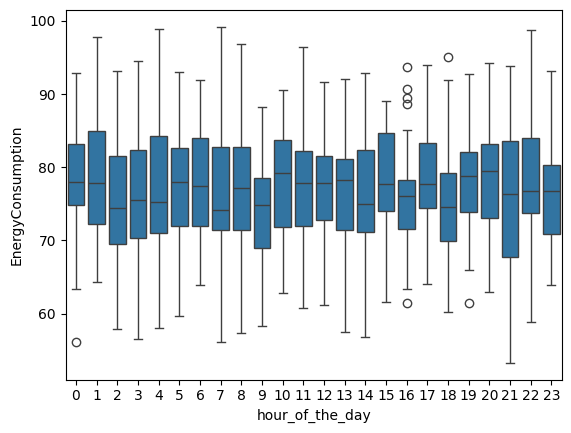

In [29]:
sns.boxplot(x='hour_of_the_day', y='EnergyConsumption', data=df)

<Axes: >

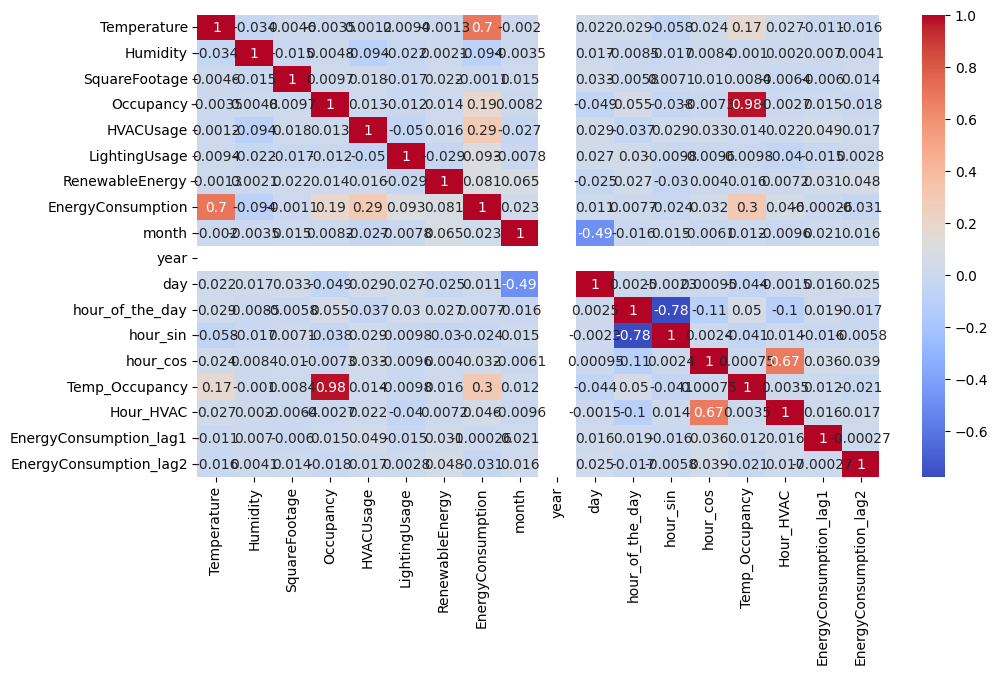

In [30]:
numeric_df = df.select_dtypes(include = 'number')

plt.figure(figsize=(11, 6)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

### Outlier Detection

In [31]:
from scipy.stats import zscore

df['z_score'] = zscore(df['EnergyConsumption'])

outliers = df[np.abs(df['z_score']) > 3]
print("Outliers based on Z-score:")
print(outliers)
#print(outliers[['Timestamp', 'EnergyConsumption', 'z_score']])


Outliers based on Z-score:
Empty DataFrame
Columns: [Timestamp, Temperature, Humidity, SquareFootage, Occupancy, HVACUsage, LightingUsage, RenewableEnergy, DayOfWeek, Holiday, EnergyConsumption, date, month, year, day, hour_of_the_day, hour_sin, hour_cos, Temp_Occupancy, Hour_HVAC, EnergyConsumption_lag1, EnergyConsumption_lag2, Holiday_Yes, DayOfWeek_Monday, DayOfWeek_Saturday, DayOfWeek_Sunday, DayOfWeek_Thursday, DayOfWeek_Tuesday, DayOfWeek_Wednesday, z_score]
Index: []

[0 rows x 30 columns]


## Interquantile Range Method

In [32]:
Q1 = df['EnergyConsumption'].quantile(0.25)
Q3 = df['EnergyConsumption'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR

outliers = df[ (df['EnergyConsumption'] < lower_bound) | (df['EnergyConsumption'] > upper_bound)]
print(outliers)

             Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
69 2022-01-03 21:00:00    20.735716  48.506636    1836.542651          4   

    HVACUsage  LightingUsage  RenewableEnergy DayOfWeek Holiday  ...  \
69          0              1         9.295439    Friday      No  ...   

    EnergyConsumption_lag1 EnergyConsumption_lag2  Holiday_Yes  \
69               86.223645              80.192646        False   

    DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  \
69             False               False             False   

    DayOfWeek_Thursday  DayOfWeek_Tuesday  DayOfWeek_Wednesday   z_score  
69               False              False                False -2.922909  

[1 rows x 30 columns]


In [33]:
outliers

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,...,EnergyConsumption_lag1,EnergyConsumption_lag2,Holiday_Yes,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,z_score
69,2022-01-03 21:00:00,20.735716,48.506636,1836.542651,4,0,1,9.295439,Friday,No,...,86.223645,80.192646,False,False,False,False,False,False,False,-2.922909


In [34]:
df = df.drop(outliers.index)

## If skewed data ,Log transform it

In [35]:
df['EnergyConsumption'] = np.log(df['EnergyConsumption'])

In [36]:
df['EnergyConsumption']

0      4.322335
1      4.423671
2      4.360176
3      4.034592
4      4.260025
         ...   
995    4.410452
996    4.198364
997    4.287077
998    4.343161
999    4.270331
Name: EnergyConsumption, Length: 999, dtype: float64

In [37]:
df['EnergyConsumption'] = np.exp(df['EnergyConsumption'])

In [38]:
df['EnergyConsumption']

0      75.364373
1      83.401855
2      78.270888
3      56.519850
4      70.811732
         ...    
995    82.306692
996    66.577320
997    72.753471
998    76.950389
999    71.545311
Name: EnergyConsumption, Length: 999, dtype: float64

In [39]:
df.dtypes

Timestamp                 datetime64[ns]
Temperature                      float64
Humidity                         float64
SquareFootage                    float64
Occupancy                          int64
HVACUsage                          int64
LightingUsage                      int64
RenewableEnergy                  float64
DayOfWeek                         object
Holiday                           object
EnergyConsumption                float64
date                              object
month                              int32
year                               int32
day                                int32
hour_of_the_day                    int32
hour_sin                         float64
hour_cos                         float64
Temp_Occupancy                   float64
Hour_HVAC                        float64
EnergyConsumption_lag1           float64
EnergyConsumption_lag2           float64
Holiday_Yes                         bool
DayOfWeek_Monday                    bool
DayOfWeek_Saturd

In [40]:
df.isnull().sum()

Timestamp                 0
Temperature               0
Humidity                  0
SquareFootage             0
Occupancy                 0
HVACUsage                 0
LightingUsage             0
RenewableEnergy           0
DayOfWeek                 0
Holiday                   0
EnergyConsumption         0
date                      0
month                     0
year                      0
day                       0
hour_of_the_day           0
hour_sin                  0
hour_cos                  0
Temp_Occupancy            0
Hour_HVAC                 0
EnergyConsumption_lag1    0
EnergyConsumption_lag2    0
Holiday_Yes               0
DayOfWeek_Monday          0
DayOfWeek_Saturday        0
DayOfWeek_Sunday          0
DayOfWeek_Thursday        0
DayOfWeek_Tuesday         0
DayOfWeek_Wednesday       0
z_score                   0
dtype: int64

## Train -Test Split

In [41]:

features = [
    'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage',
    'RenewableEnergy', 'month', 'year', 'day', 'hour_sin', 'hour_cos',
    'Holiday_Yes',
    'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
    'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
    'Temp_Occupancy', 'Hour_HVAC', 'EnergyConsumption_lag1', 'EnergyConsumption_lag2'
]

X = df[features]
y = df['EnergyConsumption']

In [42]:
split_idx = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train , y_test = y.iloc[:split_idx],y.iloc[split_idx:]

## Scaling the features 

In [43]:
df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption', 'date', 'month', 'year', 'day', 'hour_of_the_day',
       'hour_sin', 'hour_cos', 'Temp_Occupancy', 'Hour_HVAC',
       'EnergyConsumption_lag1', 'EnergyConsumption_lag2', 'Holiday_Yes',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'z_score'],
      dtype='object')

In [44]:
num_cols = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy','month', 'year', 'day', 'hour_sin', 'hour_cos']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

C:\Users\balaji.ramachandran\AppData\Local\Temp\ipykernel_18092\165554148.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
C:\Users\balaji.ramachandran\AppData\Local\Temp\ipykernel_18092\165554148.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_cols] = scaler.fit_transform(X_test[num_cols])


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"MAE  (Mean Absolute Error): {mae:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R²   (R-squared): {r2:.3f}")
    return mae, rmse, r2

## Simple Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

X_train_temp = X_train[['Temperature']]
X_test_temp = X_test[['Temperature']]

simple_lr = LinearRegression()
simple_lr.fit(X_train_temp, y_train)
y_pred_SLR = simple_lr.predict(X_test_temp)

mae_SLR , rmse_SLR , r2_SLR = evaluate_model("Simple Linear Regression", y_test, y_pred_SLR)


Simple Linear Regression Results:
MAE  (Mean Absolute Error): 4.28
RMSE (Root Mean Squared Error): 5.37
R²   (R-squared): 0.530


## Multiple Linear Regression 

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_LR = lr.predict(X_test)

mae_LR , rmse_LR , r2_LR = evaluate_model("Multiple Linear Regression", y_test, y_pred_LR)


Multiple Linear Regression Results:
MAE  (Mean Absolute Error): 4.20
RMSE (Root Mean Squared Error): 5.04
R²   (R-squared): 0.585


## Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_Ridge = ridge.predict(X_test)

mae_Ridge , rmse_Ridge , r2_Ridge =  evaluate_model("Ridge Regression", y_test, y_pred_Ridge)


Ridge Regression Results:
MAE  (Mean Absolute Error): 4.19
RMSE (Root Mean Squared Error): 5.04
R²   (R-squared): 0.586


## Lasso Regression

### from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_Lasso = lasso.predict(X_test)

mae_Lasso , rmse_Lasso , r2_Lasso = evaluate_model("Lasso Regression", y_test, y_pred_Lasso)


## Decision Tree 

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_Decision_Tree = dt.predict(X_test)

mae_Decision_Tree , rmse_Decision_Tree , r2_Decision_Tree = evaluate_model("Decision Tree", y_test, y_pred_Decision_Tree)



Decision Tree Results:
MAE  (Mean Absolute Error): 6.27
RMSE (Root Mean Squared Error): 7.77
R²   (R-squared): 0.016


## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_Random_Forest = rf.predict(X_test)

mae_Random_Forest , rmse_Random_Forest , r2_Random_Forest = evaluate_model("Random Forest", y_test, y_pred_Random_Forest)



Random Forest Results:
MAE  (Mean Absolute Error): 4.24
RMSE (Root Mean Squared Error): 5.21
R²   (R-squared): 0.557


## Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_Gradient_Boost = gb.predict(X_test)

mae_Gradient_Boost , rmse_Gradient_Boost , r2_Gradient_Boost = evaluate_model("Gradient Boosting", y_test, y_pred_Gradient_Boost)



Gradient Boosting Results:
MAE  (Mean Absolute Error): 4.20
RMSE (Root Mean Squared Error): 5.15
R²   (R-squared): 0.567


## XGBoost

In [53]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_XGBoost = xgb.predict(X_test)

mae_XGBoost , rmse_XGBoost , r2_XGBoost = evaluate_model("XGBoost", y_test, y_pred_XGBoost)



XGBoost Results:
MAE  (Mean Absolute Error): 4.71
RMSE (Root Mean Squared Error): 5.76
R²   (R-squared): 0.459


## CatBoost

In [54]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

mae_catBoost , rmse_catBoost , r2_catBoost = evaluate_model("CatBoost", y_test, y_pred_cat)



CatBoost Results:
MAE  (Mean Absolute Error): 4.23
RMSE (Root Mean Squared Error): 5.18
R²   (R-squared): 0.562


## LightGBM

In [55]:
# !pip install lightgbm

In [56]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

mae_lgb ,rmse_lgb , r2_lgb = evaluate_model("LightGBM", y_test, y_pred_lgb)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 22
[LightGBM] [Info] Start training from score 76.963744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

## K- Nearest Neighbours

In [57]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

mae_KNN , rmse_KNN , r2_KNN = evaluate_model("K-Nearest Neighbors", y_test, y_pred_KNN)



K-Nearest Neighbors Results:
MAE  (Mean Absolute Error): 5.94
RMSE (Root Mean Squared Error): 7.30
R²   (R-squared): 0.130


## Support Vector Regression

In [58]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_SVR = svr.predict(X_test)

mae_SVR , rmse_SVR , r2_SVR = evaluate_model("Support Vector Regression", y_test, y_pred_SVR)



Support Vector Regression Results:
MAE  (Mean Absolute Error): 6.05
RMSE (Root Mean Squared Error): 7.41
R²   (R-squared): 0.105


## MLPRegressor

In [59]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_MLP = mlp.predict(X_test)


mae_MLP , rmse_MLP , r2_MLP = evaluate_model("Support Vector Regression", y_test, y_pred_MLP)



Support Vector Regression Results:
MAE  (Mean Absolute Error): 5.66
RMSE (Root Mean Squared Error): 6.98
R²   (R-squared): 0.205


## Model Results Comparison

In [60]:
model_results = [
    {"Model": "Simple Linear Regression", "MAE": mae_SLR, "RMSE": rmse_SLR, "R²": r2_SLR},
    {"Model": "Multiple Linear Regression", "MAE": mae_LR, "RMSE": rmse_LR, "R²": r2_LR},
    {"Model": "Ridge Regression", "MAE": mae_Ridge, "RMSE": rmse_Ridge, "R²": r2_Ridge},
    {"Model": "Lasso Regression", "MAE": mae_Lasso, "RMSE": rmse_Lasso, "R²": r2_Lasso},
    {"Model": "Decision Tree", "MAE": mae_Decision_Tree, "RMSE": rmse_Decision_Tree, "R²": r2_Decision_Tree},
    {"Model": "Random Forest", "MAE": mae_Random_Forest, "RMSE": rmse_Random_Forest, "R²": r2_Random_Forest},
    {"Model": "Gradient Boosting", "MAE": mae_Gradient_Boost, "RMSE": rmse_Gradient_Boost, "R²": r2_Gradient_Boost},
    {"Model": "XGBoost", "MAE": mae_XGBoost, "RMSE": rmse_XGBoost, "R²": r2_XGBoost},
    {"Model": "CatBoost", "MAE": mae_catBoost, "RMSE": rmse_catBoost, "R²": r2_catBoost},
    {"Model": "LightGBM", "MAE": mae_lgb, "RMSE": rmse_lgb, "R²": r2_lgb},   
    {"Model": "K-Nearest Neighbors", "MAE": mae_KNN, "RMSE": rmse_KNN, "R²": r2_KNN},
    {"Model": "Support Vector Regression", "MAE": mae_SVR, "RMSE": rmse_SVR, "R²": r2_SVR},
    {"Model": "MLP Regressor", "MAE": mae_MLP, "RMSE": rmse_MLP, "R²": r2_MLP}
]
results_df = pd.DataFrame(model_results)
print(results_df)

                         Model       MAE      RMSE        R²
0     Simple Linear Regression  4.278520  5.365015  0.530307
1   Multiple Linear Regression  4.196003  5.042395  0.585097
2             Ridge Regression  4.193773  5.038847  0.585681
3             Lasso Regression  4.111404  4.969058  0.597078
4                Decision Tree  6.268004  7.765424  0.015982
5                Random Forest  4.238194  5.207982  0.557400
6            Gradient Boosting  4.198948  5.151663  0.566921
7                      XGBoost  4.710005  5.757144  0.459138
8                     CatBoost  4.225569  5.183149  0.561611
9                     LightGBM  4.361988  5.295841  0.542341
10         K-Nearest Neighbors  5.938940  7.303276  0.129622
11   Support Vector Regression  6.048194  7.405052  0.105194
12               MLP Regressor  5.656993  6.978119  0.205399


# To improve model performances -

## 1. Ensemble Method

In [61]:
# Example: Average of top 3 models
ensemble_pred_avg = (y_pred_Lasso + y_pred_cat + y_pred_Gradient_Boost) / 3

# Evaluate
evaluate_model("Ensemble (Lasso + CatBoost + GradientBoosting)", y_test, ensemble_pred_avg)


Ensemble (Lasso + CatBoost + GradientBoosting) Results:
MAE  (Mean Absolute Error): 4.11
RMSE (Root Mean Squared Error): 4.99
R²   (R-squared): 0.593


(4.109046650191637, np.float64(4.994831605443635), 0.5928877057693898)

In [62]:
ensemble_pred_weighted = (
    0.4 * y_pred_Lasso +
    0.3 * y_pred_cat +
    0.2 * y_pred_Gradient_Boost +
    0.1 * y_pred_Random_Forest
)

evaluate_model("Weighted Ensemble", y_test, ensemble_pred_weighted)


Weighted Ensemble Results:
MAE  (Mean Absolute Error): 4.10
RMSE (Root Mean Squared Error): 4.98
R²   (R-squared): 0.595


(4.101996821186779, np.float64(4.982359019204706), 0.5949183661747848)

## 2. Cross-Validation Method

In [63]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
model = GradientBoostingRegressor()

cv_scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')
print("TimeSeriesSplit Cross-validated R²:", cv_scores.mean())

TimeSeriesSplit Cross-validated R²: 0.5225850746590599


## 3. Feature Selection

In [64]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Top selected features:", selected_features)

Top selected features: Index(['Temperature', 'Humidity', 'Occupancy', 'HVACUsage', 'LightingUsage',
       'RenewableEnergy', 'hour_cos', 'Holiday_Yes', 'Temp_Occupancy',
       'Hour_HVAC'],
      dtype='object')


In [65]:
selected_features = [
    'Temperature', 'Humidity', 'Occupancy', 'HVACUsage', 'LightingUsage',
    'RenewableEnergy', 'hour_sin', 'hour_cos', 'Holiday_Yes',
    'DayOfWeek_Tuesday'
]

X_train = X_train[selected_features]
X_test = X_test[selected_features]

## 4.Hyperparamter Tuning - Better Model

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_gb = grid.best_estimator_
y_pred_gb_tuned = best_gb.predict(X_test)
evaluate_model("Tuned Gradient Boosting", y_test, y_pred_gb_tuned)




Tuned Gradient Boosting Results:
MAE  (Mean Absolute Error): 4.10
RMSE (Root Mean Squared Error): 4.96
R²   (R-squared): 0.598


(4.0978427347142645, np.float64(4.964473257471222), 0.5978214845949616)

## Actual Vs Predicted Performance

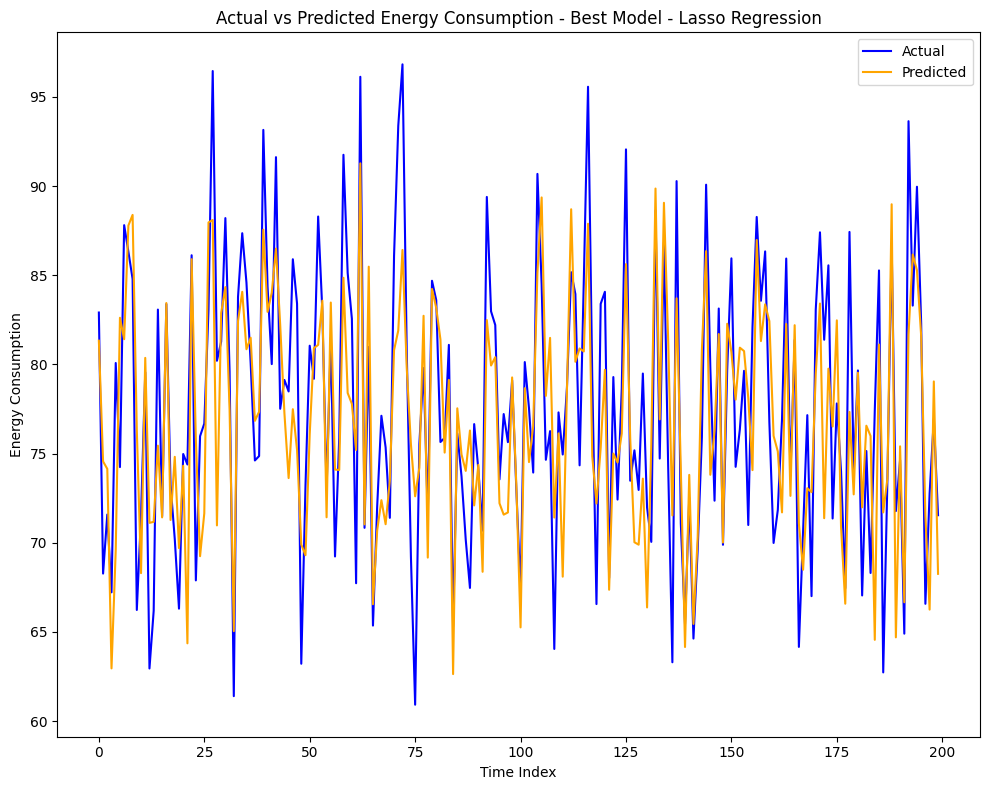

In [71]:
plt.figure(figsize=(10, 8))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_gb_tuned, label='Predicted', color='orange')
plt.xlabel('Time Index')
plt.ylabel('Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption - Best Model - Lasso Regression')
plt.legend()
plt.tight_layout()
plt.show()